# Анализ успеваемости учащихся и факторов, способствующих этому

## 0. Описание задачи

Задача: Создать модель, которая на основе характеристик студентов (например, количество часов учебы, посещаемость, образование родителей) будет предсказывать их результаты на экзамене и распределять их в три группы:

* Успешно сдавшие — 10% лучших студентов.
* Нормально сдавшие — 70% студентов со средними баллами.
* Провалившие экзамен — 20% с наименьшими баллами.

## 1. Чтение данных

In [308]:
!kaggle datasets download lainguyn123/student-performance-factors --unzip --force

Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
  0% 0.00/93.9k [00:00<?, ?B/s]
100% 93.9k/93.9k [00:00<00:00, 83.7MB/s]


In [309]:
import pandas as pd
raw_data = pd.read_csv("StudentPerformanceFactors.csv")

## 2. Визуализация данных и вычисление характеристик

### Вывод общей информации и описательной статистики

In [310]:
raw_data.shape

(6607, 20)

In [311]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [312]:
raw_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [313]:
raw_data.describe(include='all')

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607,6607,6607,6607.00000,6607.000000,6607,6607,6607.000000,6607,6529,6607,6607,6607.000000,6607,6517,6540,6607,6607.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3362,3319,3938,NaN,NaN,3351,6108,NaN,2672,3925,4598,2638,NaN,5912,3223,3884,3814,NaN
mean,19.975329,79.977448,NaN,NaN,NaN,7.02906,75.070531,NaN,NaN,1.493719,NaN,NaN,NaN,NaN,2.967610,NaN,NaN,NaN,NaN,67.235659
std,5.990594,11.547475,NaN,NaN,NaN,1.46812,14.399784,NaN,NaN,1.230570,NaN,NaN,NaN,NaN,1.031231,NaN,NaN,NaN,NaN,3.890456
min,1.000000,60.000000,NaN,NaN,NaN,4.00000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.00000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.00000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.00000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


### Визуализация распределения экзаменационных баллов
Построим гистограмму, чтобы увидеть распределение баллов на экзамене

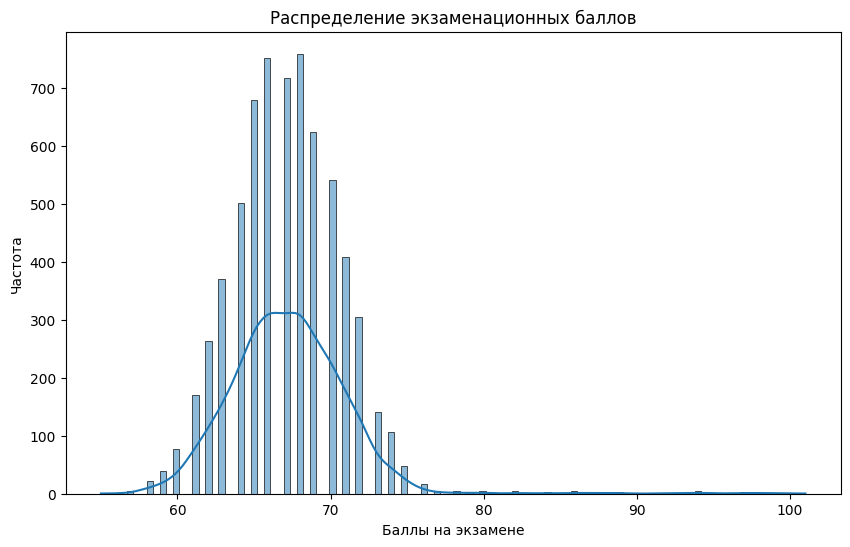

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(raw_data['Exam_Score'], kde=True)
plt.title("Распределение экзаменационных баллов")
plt.xlabel("Баллы на экзамене")
plt.ylabel("Частота")
plt.show()

Построим графики для некоторых наиболее интересных полей

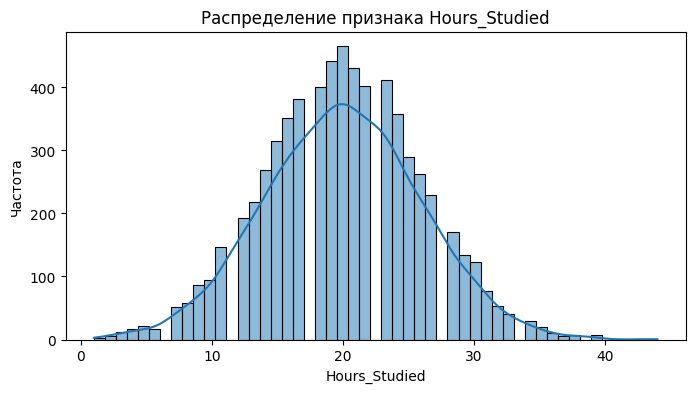

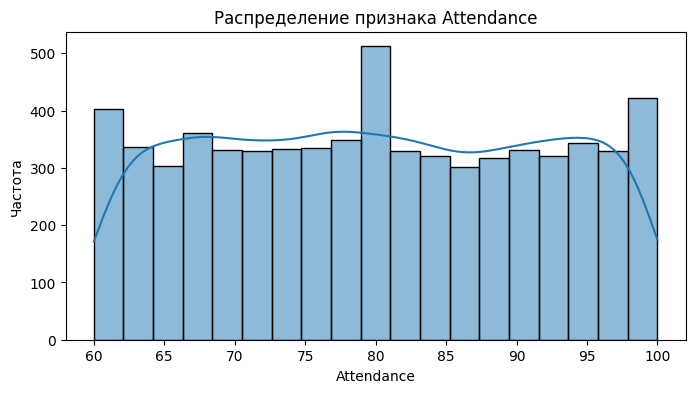

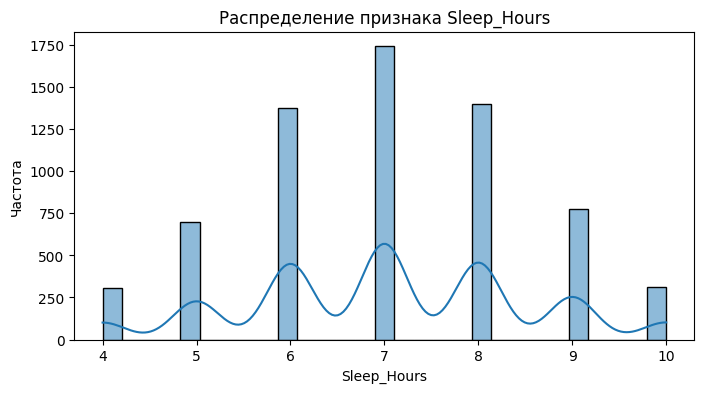

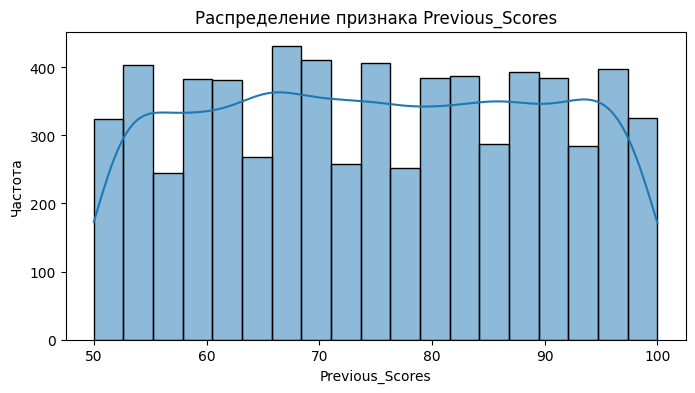

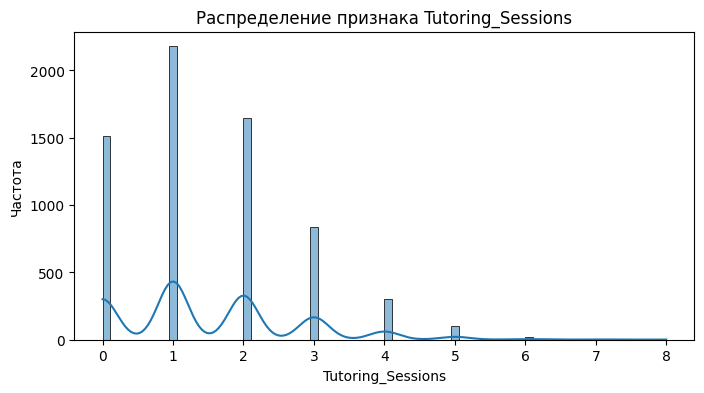

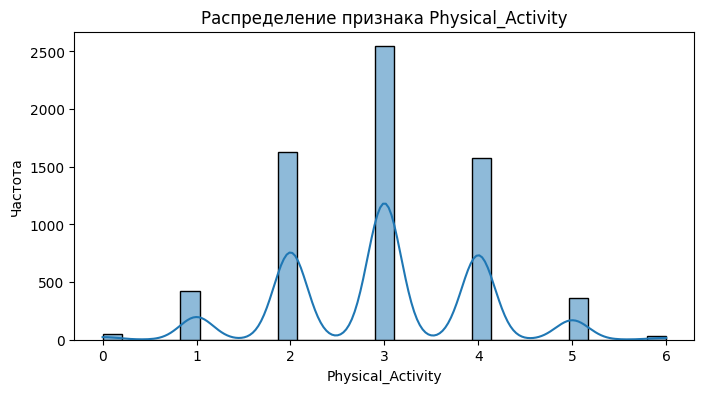

In [315]:
quantitative_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']

for feature in quantitative_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(raw_data[feature], kde=True)
    plt.title(f"Распределение признака {feature}")
    plt.xlabel(feature)
    plt.ylabel("Частота")
    plt.show()

#### Корреляционная матрица для числовых признаков

Преобразуем категориальные переменные в числовые значения

In [316]:
from sklearn.preprocessing import LabelEncoder

data_numeric = raw_data.copy()

label_encoders = {}
for column in data_numeric.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_numeric[column] = le.fit_transform(data_numeric[column])
    label_encoders[column] = le

Построим матрицу корреляции

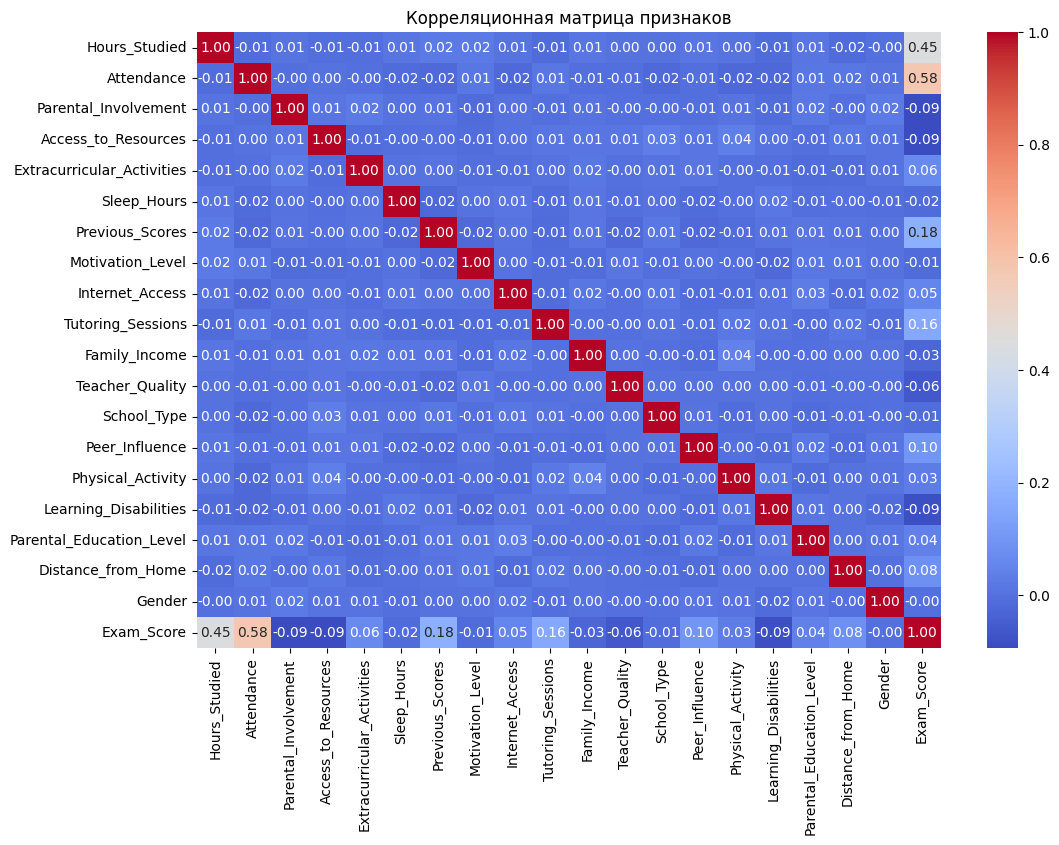

In [317]:
plt.figure(figsize=(12, 8))
correlation_matrix = data_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()

##### Выводы:
Признаки с наибольшей корреляцией с результатом экзамена (Exam_Score):

* Attendance (Посещаемость): Корреляция 0.58. Это достаточно сильная положительная корреляция, что указывает на то, что чем выше посещаемость студента, тем лучше его результаты на экзамене.

* Hours_Studied (Часы учебы): Корреляция 0.45. Тоже сильная положительная корреляция. Она может указывать на то, что большое количество часов учебы приводит к лучшим результатам.

* Previous_Scores (Предыдущие оценки): Имеет корреляцию 0.18 с Exam_Score.

#### Диаграммы разброса

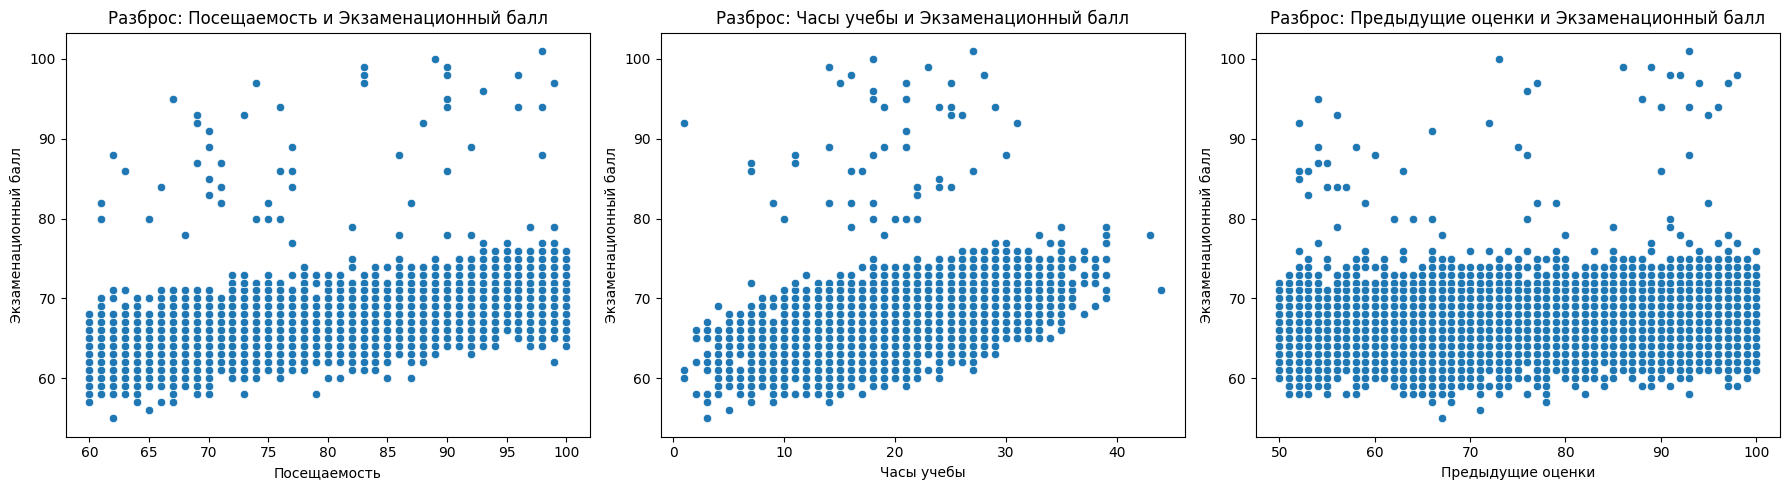

In [318]:
plt.figure(figsize=(18, 5))

# Разброс Exam_Score и Attendance
plt.subplot(1, 3, 1)
sns.scatterplot(x=raw_data['Attendance'], y=raw_data['Exam_Score'])
plt.title("Разброс: Посещаемость и Экзаменационный балл")
plt.xlabel("Посещаемость")
plt.ylabel("Экзаменационный балл")

# Разброс Exam_Score и Hours_Studied
plt.subplot(1, 3, 2)
sns.scatterplot(x=raw_data['Hours_Studied'], y=raw_data['Exam_Score'])
plt.title("Разброс: Часы учебы и Экзаменационный балл")
plt.xlabel("Часы учебы")
plt.ylabel("Экзаменационный балл")

# Разброс Exam_Score и Previous_Scores
plt.subplot(1, 3, 3)
sns.scatterplot(x=raw_data['Previous_Scores'], y=raw_data['Exam_Score'])
plt.title("Разброс: Предыдущие оценки и Экзаменационный балл")
plt.xlabel("Предыдущие оценки")
plt.ylabel("Экзаменационный балл")

plt.tight_layout()
plt.show()

### Вывод:

На основании построенных диаграмм можно сделать вывод, что посещаемость является наиболее важным предиктором успеха на экзамене среди рассмотренных признаков.

Также и часы учебы имеют прямую положительную зависимости с результатами экзамена.



## Обработать пропущенные значения

In [319]:
raw_data.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


Заполним пропуски наиболее часто встречающимися значениями

In [320]:
not_null_data = raw_data.copy()
not_null_data['Teacher_Quality'] = not_null_data['Teacher_Quality'].fillna(not_null_data['Teacher_Quality'].mode()[0])
not_null_data['Parental_Education_Level'] = not_null_data['Parental_Education_Level'].fillna(not_null_data['Parental_Education_Level'].mode()[0])
not_null_data['Distance_from_Home'] = not_null_data['Distance_from_Home'].fillna(not_null_data['Distance_from_Home'].mode()[0])

In [321]:
not_null_data.isna().sum().sum()

0

## 4. Обработать категориальные признаки

Преобразуем численный результат экзамена в категориальную оценку:

* x < 65 - Плохо
* 65 <= x < 72 - Хорошо
* 72 <= x - Отлично

Числа подобраны, что группы составляли соотношение 20/70/10

In [322]:
categorical_processed_data = not_null_data.copy()

categorical_processed_data['Exam_Score'] = pd.cut(
    categorical_processed_data['Exam_Score'],
    bins=[-float('inf'), 65, 72, float('inf')],
    labels=['Плохо', 'Хорошо', 'Отлично']
)

categorical_processed_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,Хорошо
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,Плохо
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,Отлично
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,Хорошо
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,Хорошо


Обработка упорядоченных категориальных признаков

In [323]:
from sklearn.preprocessing import LabelEncoder

ordered_columns = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
                   'Family_Income', 'Teacher_Quality', 'Peer_Influence',
                   'Parental_Education_Level', 'Distance_from_Home']

for col in ordered_columns:
    le = LabelEncoder()
    categorical_processed_data[col] = le.fit_transform(categorical_processed_data[col])

Обработка бинарных категориальных признаков

In [324]:
one_hot_columns = ['Extracurricular_Activities', 'Internet_Access', 'School_Type',
                   'Learning_Disabilities', 'Gender']

categorical_processed_data = pd.get_dummies(categorical_processed_data, columns=one_hot_columns, drop_first=True)

categorical_processed_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Gender_Male
0,23,84,1,0,7,73,1,0,1,2,2,3,1,2,Хорошо,False,True,True,False,True
1,19,64,1,2,8,59,1,2,2,2,0,4,0,1,Плохо,False,True,True,False,False
2,24,98,2,2,7,91,2,2,2,2,1,4,2,2,Отлично,True,True,True,False,True
3,29,89,1,2,8,98,2,1,2,2,0,4,1,1,Хорошо,True,True,True,False,True
4,19,92,2,2,6,65,2,3,2,0,1,4,0,2,Хорошо,True,True,True,False,False


## 5. Нормализация данных

In [325]:
from sklearn.preprocessing import StandardScaler

data_normalized = categorical_processed_data.copy()

numeric_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
                   'Tutoring_Sessions', 'Physical_Activity',
                   'Teacher_Quality', 'Parental_Involvement', 'Access_to_Resources',
                   'Motivation_Level', 'Family_Income', 'Parental_Education_Level',
                   'Distance_from_Home', 'Peer_Influence']

scaler = StandardScaler()
data_normalized[numeric_columns] = scaler.fit_transform(data_normalized[numeric_columns])


data_normalized.describe(include='all')

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Gender_Male
count,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6607,6607,6607,6607,6607,6607
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Хорошо,True,True,True,False,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4105,3938,6108,4598,5912,3814
mean,-1.161474e-16,-3.089199e-16,2.823028e-17,-2.688598e-18,-2.016449e-16,2.048712e-16,-2.054089e-16,7.850707e-17,-4.194213e-17,9.463866e-17,-8.280882e-17,-1.720703e-17,8.146453e-17,5.162109e-17,NaN,NaN,NaN,NaN,NaN,NaN
std,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,NaN,NaN,NaN,NaN,NaN,NaN
min,-3.167760e+00,-1.730158e+00,-1.409559e+00,-1.380517e+00,-2.063380e+00,-1.741167e+00,-1.671088e+00,-1.213934e+00,-1.632214e+00,-1.462550e+00,-1.575587e+00,-2.877953e+00,-1.283503e+00,-2.235736e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,-6.636453e-01,-8.641026e-01,-1.409559e+00,-1.380517e+00,-7.009903e-01,-8.383073e-01,-3.930605e-01,-4.012417e-01,-2.848830e-01,-1.462550e+00,-2.525185e-01,-9.383768e-01,-1.283503e+00,-7.436647e-01,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.118568e-03,1.953115e-03,9.010618e-01,9.138045e-01,-1.979558e-02,-4.898448e-03,8.849665e-01,-4.012417e-01,-2.848830e-01,7.683323e-01,-2.525185e-01,3.141133e-02,1.482215e-01,7.484071e-01,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.718825e-01,8.680088e-01,9.010618e-01,9.138045e-01,6.613991e-01,8.979612e-01,8.849665e-01,4.114511e-01,1.062448e+00,7.683323e-01,1.070550e+00,1.001199e+00,1.482215e-01,7.484071e-01,NaN,NaN,NaN,NaN,NaN,NaN


## 6. Разделение на обучающую и тестовую выборку

In [326]:
from sklearn.model_selection import train_test_split

data = data_normalized.copy()

X = data.drop('Exam_Score', axis=1)
y = data['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (5285, 19)
Размер тестовой выборки: (1322, 19)


## 7. Классификатор ближайших соседей

In [327]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Точность классификатора K-ближайших соседей:", accuracy)
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred))

Точность классификатора K-ближайших соседей: 0.789712556732224

Отчет по классификации:
              precision    recall  f1-score   support

     Отлично       0.55      0.08      0.13        78
       Плохо       0.79      0.70      0.74       423
      Хорошо       0.79      0.90      0.84       821

    accuracy                           0.79      1322
   macro avg       0.71      0.56      0.57      1322
weighted avg       0.78      0.79      0.77      1322



## 8. Подбор оптимального значения количества соседий

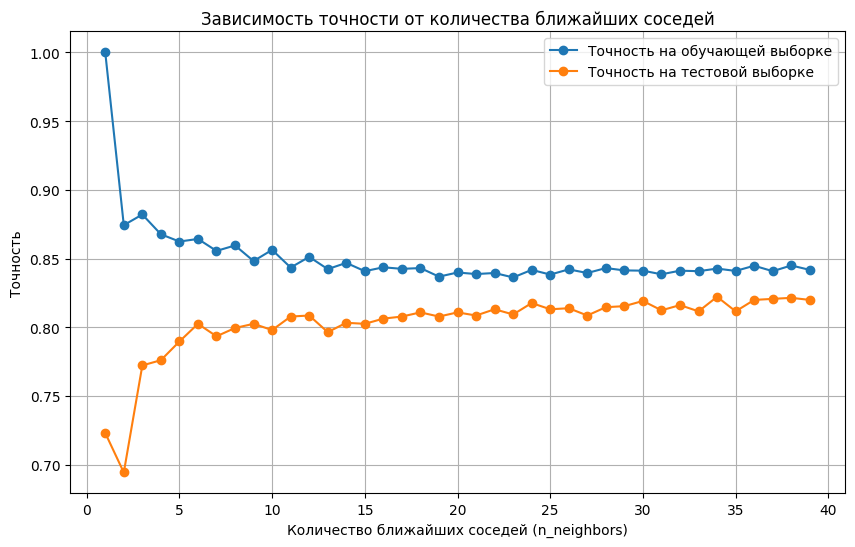

Лучшая точность на тестовой выборке: 0.8222 при n_neighbors = 34


In [328]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neighbor_range = range(1, 40)
train_accuracies = []
test_accuracies = []

for n_neighbors in neighbor_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, knn.predict(X_train))
    train_accuracies.append(train_accuracy)

    test_accuracy = accuracy_score(y_test, knn.predict(X_test))
    test_accuracies.append(test_accuracy)

best_test_accuracy = max(test_accuracies)
best_n_neighbors = neighbor_range[test_accuracies.index(best_test_accuracy)]

plt.figure(figsize=(10, 6))
plt.plot(neighbor_range, train_accuracies, label='Точность на обучающей выборке', marker='o')
plt.plot(neighbor_range, test_accuracies, label='Точность на тестовой выборке', marker='o')
plt.xlabel("Количество ближайших соседей (n_neighbors)")
plt.ylabel("Точность")
plt.title("Зависимость точности от количества ближайших соседей")
plt.legend()
plt.grid()
plt.show()

print(f"Лучшая точность на тестовой выборке: {best_test_accuracy:.4f} при n_neighbors = {best_n_neighbors}")

## 9. Вычисление ошибки

In [329]:
best_train_error = 1 - accuracy_score(y_train, KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(X_train, y_train).predict(X_train))
best_test_error = 1 - best_test_accuracy

print(f"Ошибка на обучающей выборке при n_neighbors = {best_n_neighbors}: {best_train_error:.4f}")
print(f"Ошибка на тестовой выборке при n_neighbors = {best_n_neighbors}: {best_test_error:.4f}")

Ошибка на обучающей выборке при n_neighbors = 34: 0.1572
Ошибка на тестовой выборке при n_neighbors = 34: 0.1778


### На основе полученных результатов можно сделать следующие выводы:

* Высокая точность модели (82.22%) при n_neighbors = 34. Это свидетельствует о том, что модель хорошо обобщает данные и правильно классифицирует большинство экземпляров.

* Низкие ошибки наобучающей (15.72%) и тестовой выборке (17.78%). Это означает, что модель имеет небольшое количество неверно классифицированных примеров как на обучающей, так и на тестовой выборках. Низкие значения ошибок свидетельствуют о высокой надежности модели.

В целом, можно считать, что модель KNN с подобными параметрами является удачным решением для поставленной задачи классификации.

## 10. Другие классификаторы

                          Best Score (Train) Test Accuracy  \
Logistic Regression                 0.851277      0.839637   
Random Forest                       0.859224      0.859304   
Gradient Boosting                   0.922044      0.920575   
Support Vector Classifier           0.921665      0.922088   

                                                                 Best Params  
Logistic Regression          {'C': 78.47599703514607, 'solver': 'liblinear'}  
Random Forest              {'max_depth': 30, 'min_samples_split': 2, 'n_e...  
Gradient Boosting          {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...  
Support Vector Classifier                         {'C': 10, 'gamma': 'auto'}  


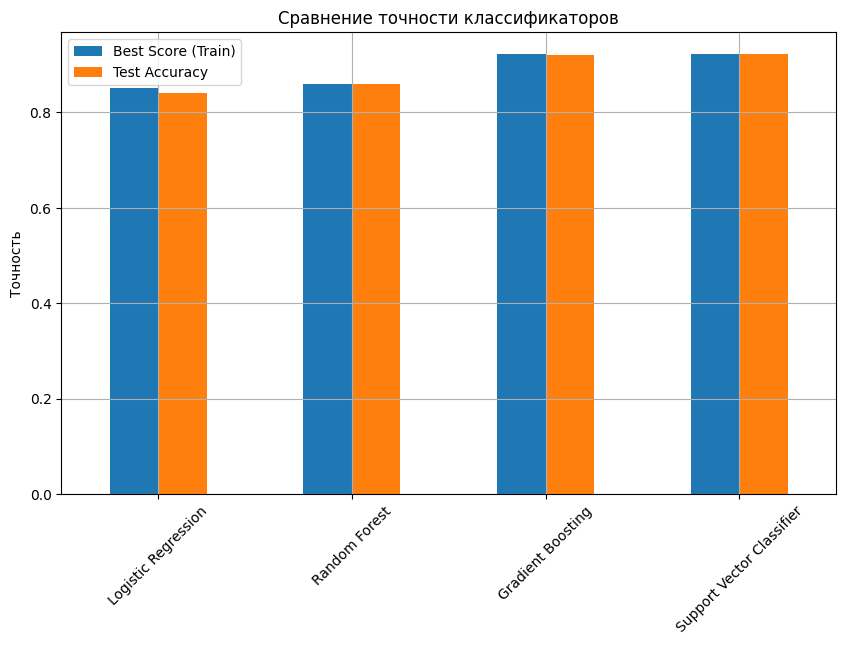

In [330]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

classifiers = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {
        'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear']
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    'Gradient Boosting': (GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    'Support Vector Classifier': (SVC(), {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    })
}

results = {}

for name, (clf, params) in classifiers.items():
    grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_

    test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

    results[name] = {
        'Best Score (Train)': best_score,
        'Test Accuracy': test_accuracy,
        'Best Params': grid_search.best_params_
    }

results_df = pd.DataFrame(results).T
print(results_df)

results_df[['Best Score (Train)', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))
plt.title('Сравнение точности классификаторов')
plt.ylabel('Точность')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## 11. Анализ сбалансированности классов

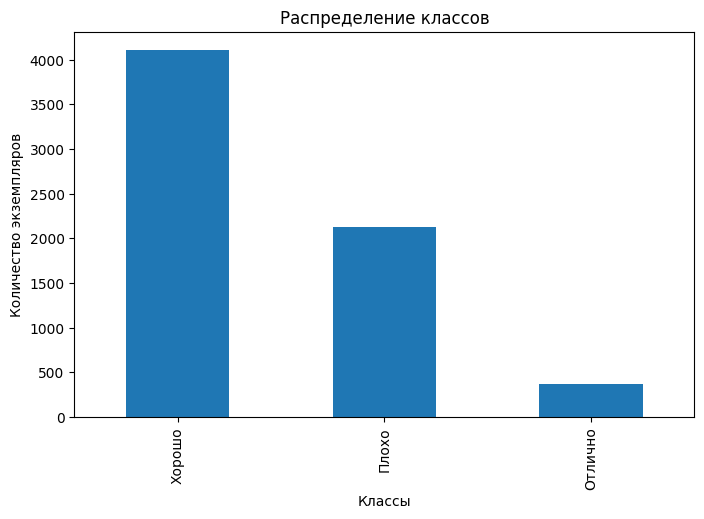

In [331]:
class_counts = y.value_counts()

class_counts.plot(kind='bar', figsize=(8, 5))
plt.title('Распределение классов')
plt.xlabel('Классы')
plt.ylabel('Количество экземпляров')
plt.show()

In [338]:
svc = SVC(C=10, gamma='auto')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Отлично       0.73      0.62      0.67        78
       Плохо       0.94      0.92      0.93       423
      Хорошо       0.93      0.95      0.94       821

    accuracy                           0.92      1322
   macro avg       0.86      0.83      0.85      1322
weighted avg       0.92      0.92      0.92      1322



### Основывая на метриках выше делаем вывод:
Модель хорошо справляется с классами "Плохо" и "Хорошо", однако ей трудно классифицировать класс "Отлично". Это может быть связано с несбалансированностью данных, где классы "Плохо" и "Хорошо" представлены намного больше, чем "Отлично".

Попробуем методы балансировки "из коробки"

In [339]:
svc = SVC(C=10, gamma='auto', class_weight='balanced')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Отлично       0.66      0.68      0.67        78
       Плохо       0.92      0.92      0.92       423
      Хорошо       0.94      0.93      0.94       821

    accuracy                           0.92      1322
   macro avg       0.84      0.85      0.84      1322
weighted avg       0.92      0.92      0.92      1322



Результат стал несколько хуже предыдущего. Попробуем увеличить количество менее представленных экземпляров.

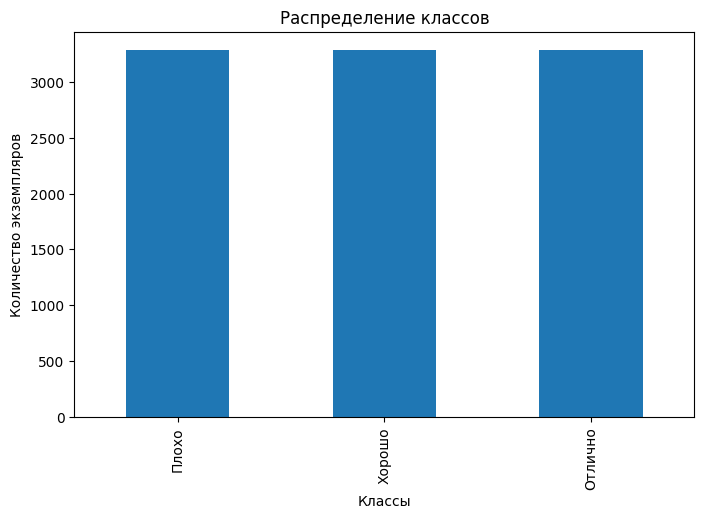

In [340]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

class_counts = y_resampled.value_counts()

class_counts.plot(kind='bar', figsize=(8, 5))
plt.title('Распределение классов')
plt.xlabel('Классы')
plt.ylabel('Количество экземпляров')
plt.show()

In [341]:
svc = SVC(C=10, gamma='auto')
svc.fit(X_resampled, y_resampled)

y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Отлично       0.48      0.54      0.51        78
       Плохо       0.93      0.91      0.92       423
      Хорошо       0.92      0.92      0.92       821

    accuracy                           0.90      1322
   macro avg       0.78      0.79      0.78      1322
weighted avg       0.90      0.90      0.90      1322



Результат стал еще хуже...

Попробуем воспользоваться другими взвешенными моделями

In [345]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

class_weights = {'Хорошо': 1, 'Плохо': 2, 'Отлично': 5}

rf = RandomForestClassifier(class_weight=class_weights, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

     Отлично       0.89      0.31      0.46        78
       Плохо       0.90      0.79      0.84       423
      Хорошо       0.85      0.95      0.90       821

    accuracy                           0.86      1322
   macro avg       0.88      0.68      0.73      1322
weighted avg       0.87      0.86      0.85      1322



In [346]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

     Отлично       0.76      0.50      0.60        78
       Плохо       0.90      0.85      0.88       423
      Хорошо       0.89      0.94      0.91       821

    accuracy                           0.89      1322
   macro avg       0.85      0.76      0.80      1322
weighted avg       0.88      0.89      0.88      1322



### Вывод:
* С помощью балансировки классов удалось поднять точность угадывания классов "Отлично". Но recall по-прежнему низкий, что может быть связано с недостаточным представлением этого класса в обучающем наборе данных.
* Применения метода SMOTE не дали весомых результатов на данном примере.

## 12. Исключение коррелированных переменных

Зачем исключать коррелированные переменные
* Мультиколлинеарность: Когда две или более переменные сильно коррелированы, это может привести к проблемам мультиколлинеарности, что затрудняет интерпретацию коэффициентов регрессии и может привести к нестабильности модели.

* Избыточная информация: Коррелированные переменные могут содержать избыточную информацию, что делает модель более сложной и может привести к переобучению.

* Упрощение модели: Исключение коррелированных переменных помогает упростить модель, что может улучшить её обобщающую способность на новых данных.

Основываясь на матрице корреляции из пункта 2 принимаем решение убрать столбцы: __Attendance__ и __Hours_Studied__

In [347]:
df = data_normalized.copy()

df_reduced = df.drop(columns=['Attendance', 'Hours_Studied'])

,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Gender_Male
0,-0.254249,-1.380517,-0.019796,-0.143800,-0.393061,-1.213934,-0.284883,0.768332,1.070550,0.031411,0.148221,0.748407,Хорошо,False,True,True,False,True
1,-0.254249,0.913804,0.661399,-1.116110,-0.393061,0.411451,1.062448,0.768332,-1.575587,1.001199,-1.283503,-0.743665,Плохо,False,True,True,False,False
2,0.901062,0.913804,-0.019796,1.106313,0.884966,0.411451,1.062448,0.768332,-0.252518,1.001199,1.579946,0.748407,Отлично,True,True,True,False,True
3,-0.254249,0.913804,0.661399,1.592469,0.884966,-0.401242,1.062448,0.768332,-1.575587,1.001199,0.148221,-0.743665,Хорошо,True,True,True,False,True
4,0.901062,0.913804,-0.700990,-0.699406,0.884966,1.224144,1.062448,-1.462550,-0.252518,1.001199,-1.283503,0.748407,Хорошо,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,-1.409559,0.913804,-0.019796,0.064552,0.884966,-0.401242,-1.632214,0.768332,1.070550,-0.938377,0.148221,0.748407,Хорошо,False,True,True,False,False
6603,-1.409559,0.913804,0.661399,0.411806,0.884966,1.224144,-0.284883,-1.462550,1.070550,-0.938377,0.148221,0.748407,Хорошо,False,True,True,False,False
6604,0.901062,-0.233356,-0.700990,-0.699406,-0.393061,1.224144,-0.284883,0.768332,-1.575587,-0.938377,1.579946,0.748407,Хорошо,True,True,True,False,False
6605,-1.409559,-1.380517,-0.700990,1.106313,-1.671088,0.411451,-0.284883,0.768332,1.070550,0.031411,0.148221,-2.235736,Хорошо,True,True,False,False,False


In [352]:
X = df_reduced.drop(columns=['Exam_Score'])  # Замените на вашу целевую переменную
y = df_reduced['Exam_Score']  # Замените на вашу целевую переменную

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svc_model = SVC(C=10, gamma='auto')
svc_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(max_depth=30, min_samples_split=2)
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(learning_rate=0.2, max_depth=3)
gb_model.fit(X_train, y_train)

svc_y_pred = svc_model.predict(X_test)
rf_y_pred = rf_model.predict(X_test)
gb_y_pred = gb_model.predict(X_test)

print("Support Vector Classifier:")
print(accuracy_score(y_test, svc_y_pred))

print("Random Forest Classification Report:")
print(accuracy_score(y_test, rf_y_pred))

print("Gradient Boosting Classification Report:")
print(accuracy_score(y_test, gb_y_pred))

Support Vector Classifier:
0.616238023197176
Random Forest Classification Report:
0.6243066061522945
Gradient Boosting Classification Report:
0.632375189107413


### Вывод:
На основании проведенного анализа и результатов обучения моделей можно сделать вывод, что удаление коррелированных переменных (в данном случае Attendance и Hours_Studied, которые коррелируют с Exam_Score) не является необходимым и не приведет к значительному улучшению производительности модели.

## 13. Общий вывод
В процессе работы над анализом факторов, влияющих на успеваемость студентов, были проведены эксперименты с различными классификаторами и методами обработки данных.

* Корреляция признаков: Удаление коррелированных переменных не дало значительного улучшения результатов, что указывает на их важность в предсказании успеваемости.

* Несбалансированность классов: Модели, такие как Random Forest и Gradient Boosting, продемонстрировали высокую точность, даже при наличии несбалансированных классов, благодаря встроенным механизмам взвешивания.

* Сравнение моделей: Все тестированные классификаторы показали сопоставимые результаты, с наилучшей производительностью у Gradient Boosting, что подтверждает его способность выявлять сложные зависимости в данных.

Таким образом, текущие методы и выбор переменных позволили достичь хороших результатов. Наиболее хорошо на этих данных себя показал метод Gradient Boosting с общей точностью 92.2%